In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from Q1_iteration import cmplx_iter #Imports function from Q1_iteration.py


In [88]:
x = np.linspace(-2, 2, 75) #Sets the array for point evaluation in later graphs
y = np.linspace(-2, 2, 75)

In [89]:
infinity = []
finite = []
'''
loop with cmplx_iter function to determine the points on the graph which diverge to infinity and those which do not.
'''
for number_x in x:
    for number_y in y:
        z = cmplx_iter(number_x, number_y)
        if abs(z[0].real) > 1e155 or abs(z[0].imag) > 1e155: #If the real value is greater than 1e155 and squared, an error will occur. if a large imaginary value is squared, 
                                                             #nan value will occur
            infinity.append([number_x, number_y, z[1]])
        else:
            finite.append([number_x, number_y])

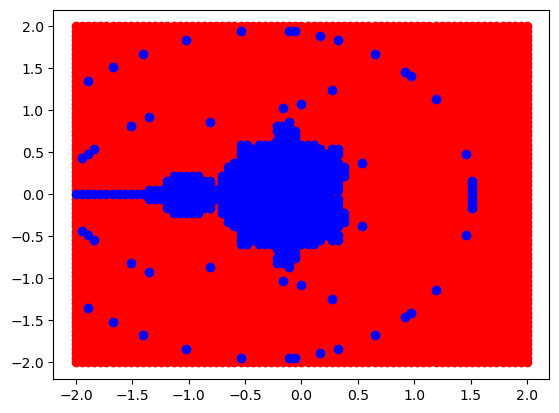

In [90]:
'''
Plotting the points (x, y) where the red dots diverge when iterated on and the blue dots converge. Proccess takes about 40 seconds to finish. Future changes plan to reduce 
the run time with arrays.
'''
for point_inf in infinity:
    plt.scatter(point_inf[0], point_inf[1], c='r')
for point_fin in finite:
    plt.scatter(point_fin[0], point_fin[1], c='b')

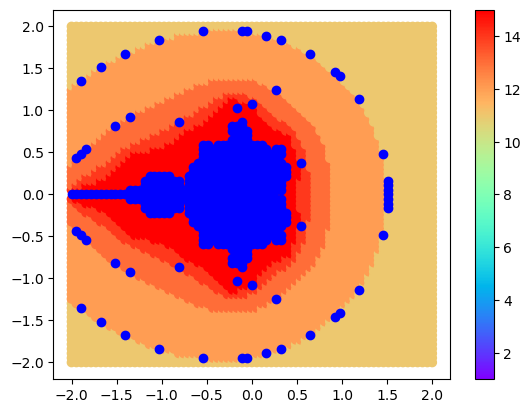

In [91]:
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=1, vmax=15)
df = pd.DataFrame(infinity, columns=['x', 'y', 'i'])

'''
parameters set above to create a colour scale map for the points on the graph above that diverge based on the iteration number at which they diverge. Divergence is considered 
to be 1 iteration greater than the last iteration where z has a value greater than 1e155.
'''

fig, ax = plt.subplots()
plt.scatter(df.x, df.y, c = cmap(norm(df.i.values))) #Plot colour scale divergent points

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm) #Show colour scale

for point_fin in finite: #plotting the finite values
    plt.scatter(point_fin[0], point_fin[1], c = 'b')